In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [6]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import classification_report

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn import metrics

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import os

In [18]:
os.getcwd()

'C:\\Users\\DEEPIKA'

In [19]:
os.chdir ('C:/Users/DEEPIKA/Desktop/df')

In [20]:
df = pd.read_csv("Customer Data.csv")

In [21]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [22]:
df.shape

(8950, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [24]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [25]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [26]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [27]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [31]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [32]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

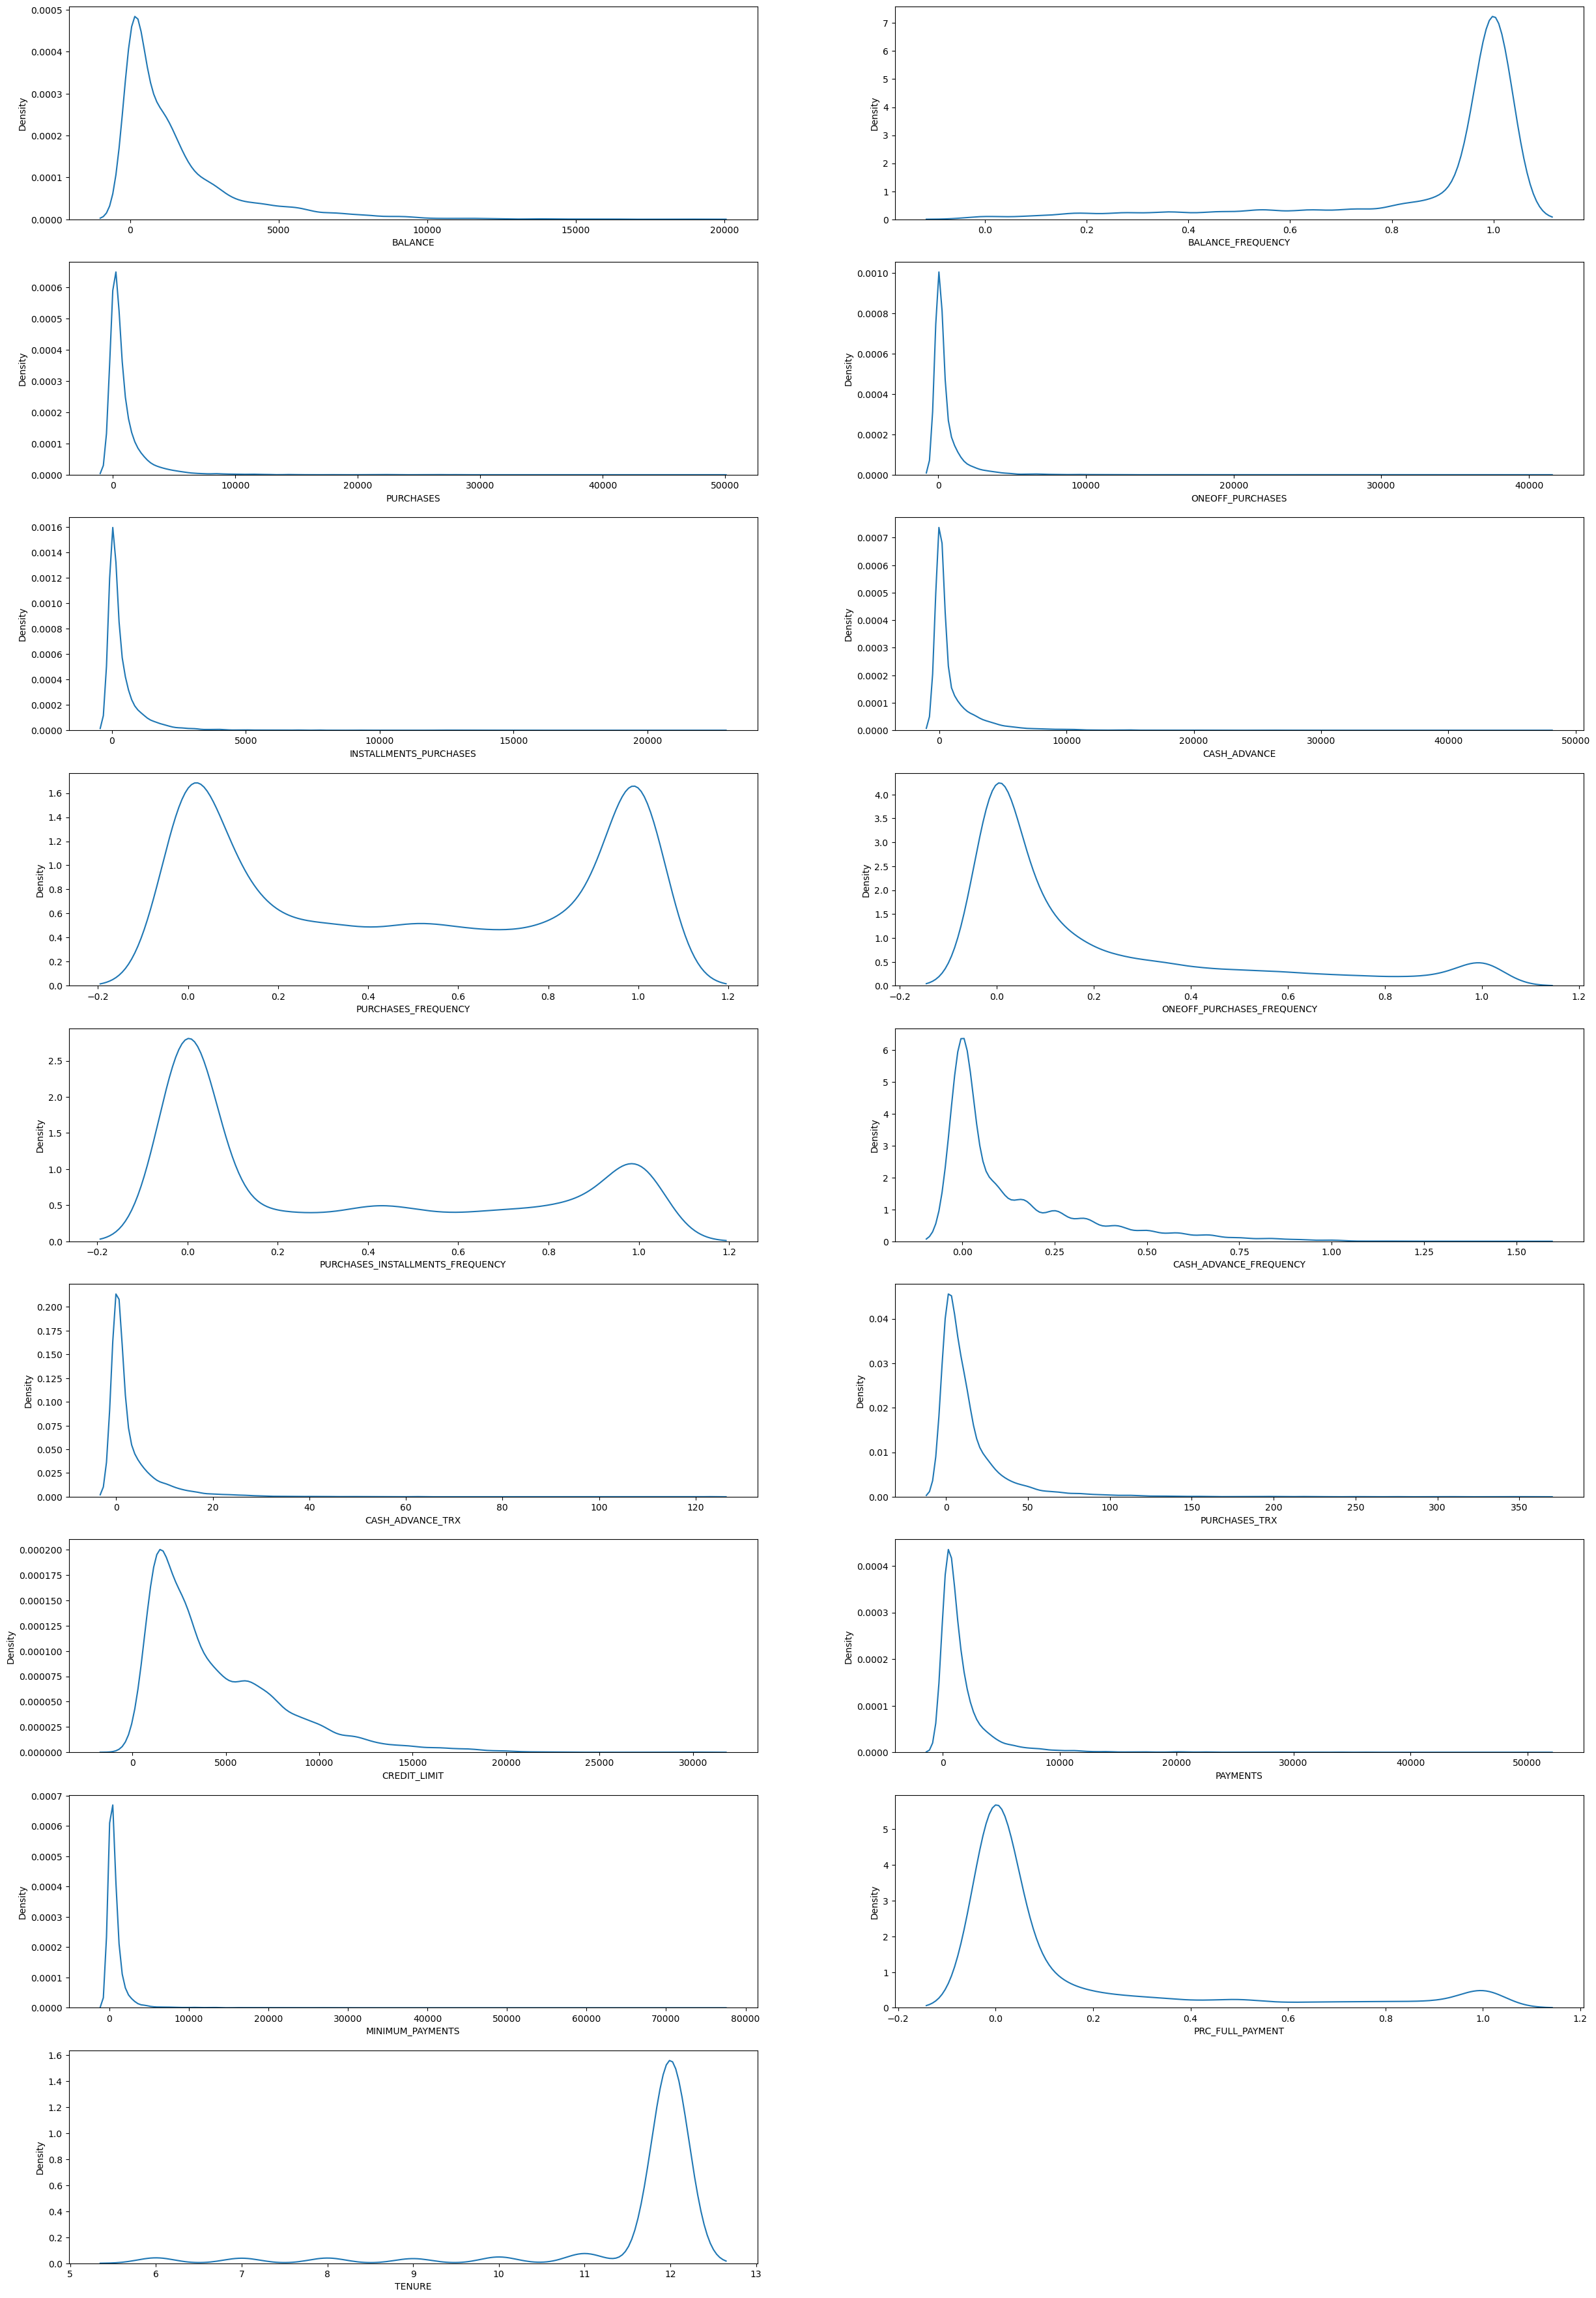

In [33]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

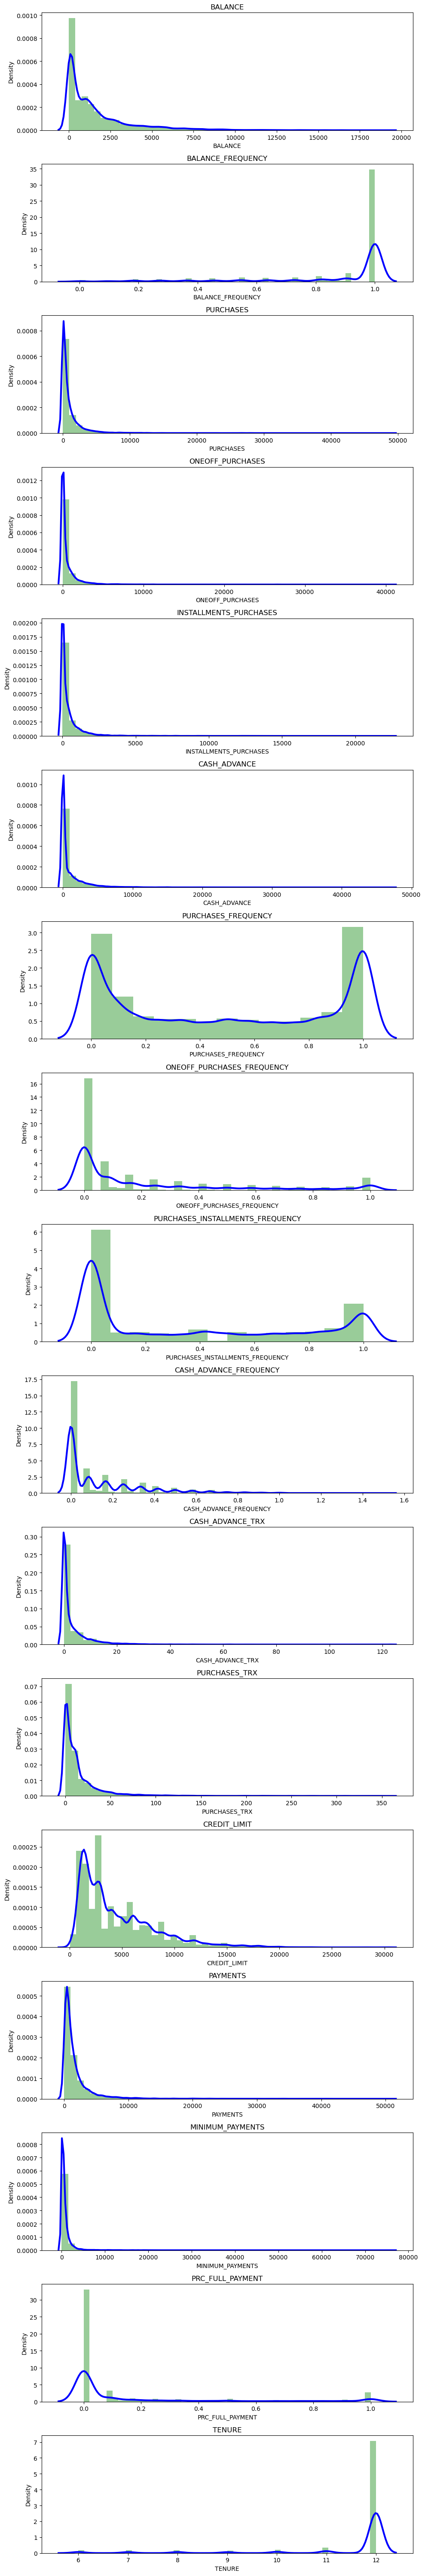

In [34]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

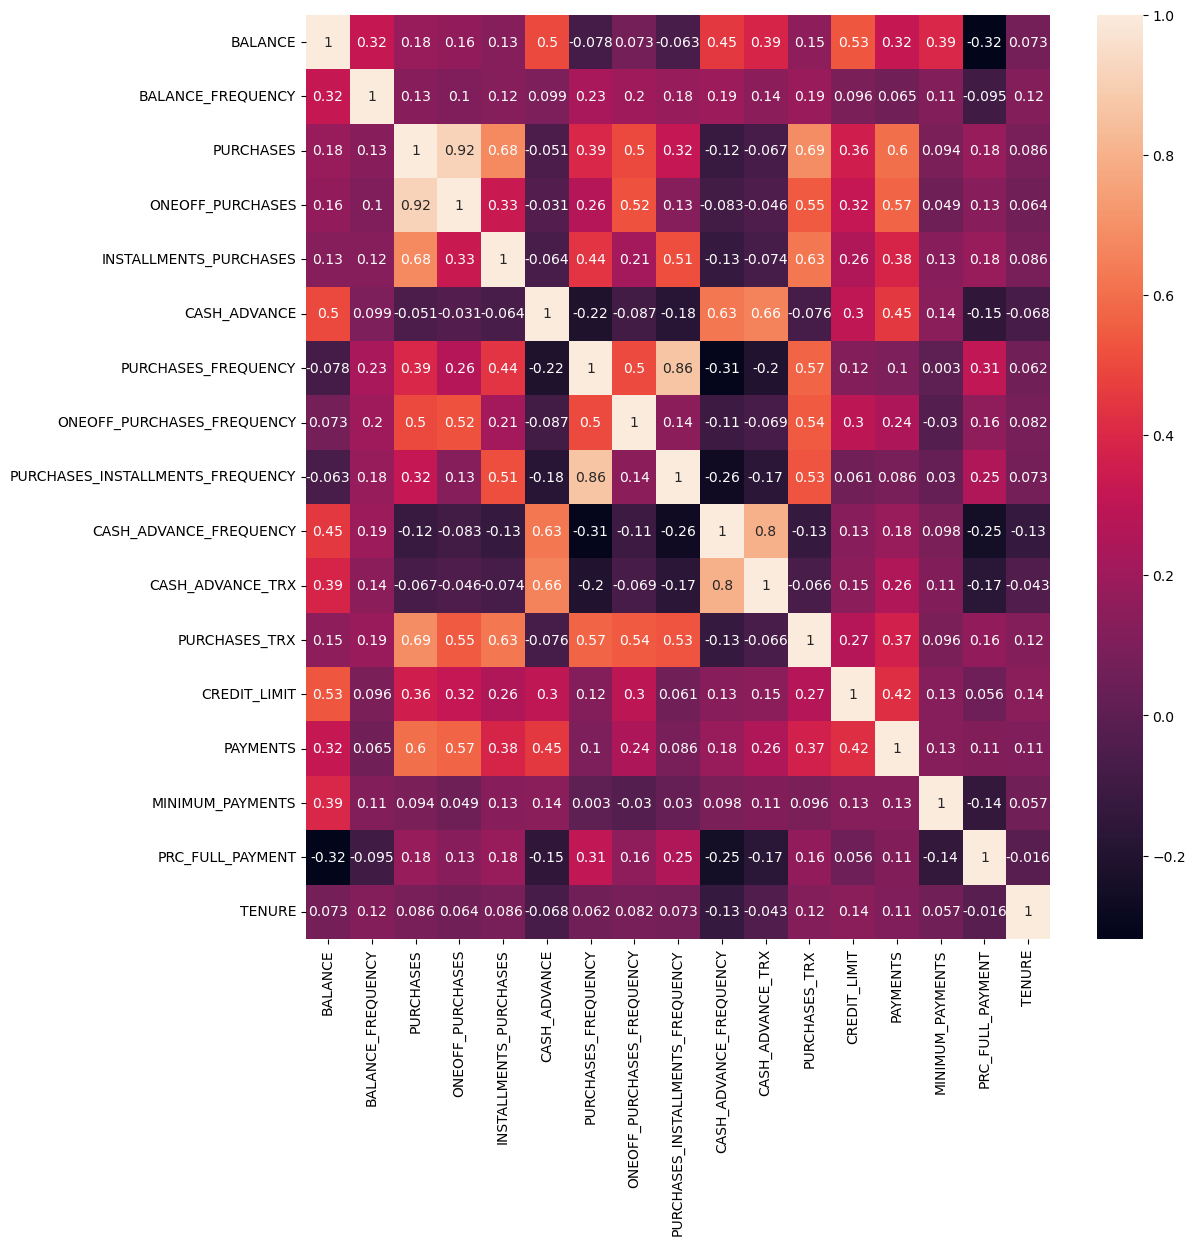

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
#scalling the dataframe
scaled_df = scalar.fit_transform(df)

In [38]:
#Dimensionality reduction
#Converting the DataFrame into 2D DataFrame for visualization

In [39]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682222,-1.076451
1,-1.138298,2.506475
2,0.969688,-0.383520
3,-0.873631,0.043165
4,-1.599435,-0.688581
...,...,...
8945,-0.359630,-2.016145
8946,-0.564371,-1.639123
8947,-0.926204,-1.810786
8948,-2.336553,-0.657966


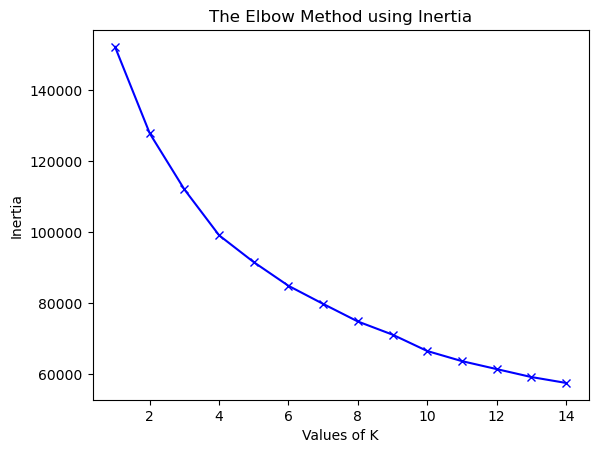

In [45]:
#Hyperparameter tuning
#Finding 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [46]:
#Model Building using KMeans
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)


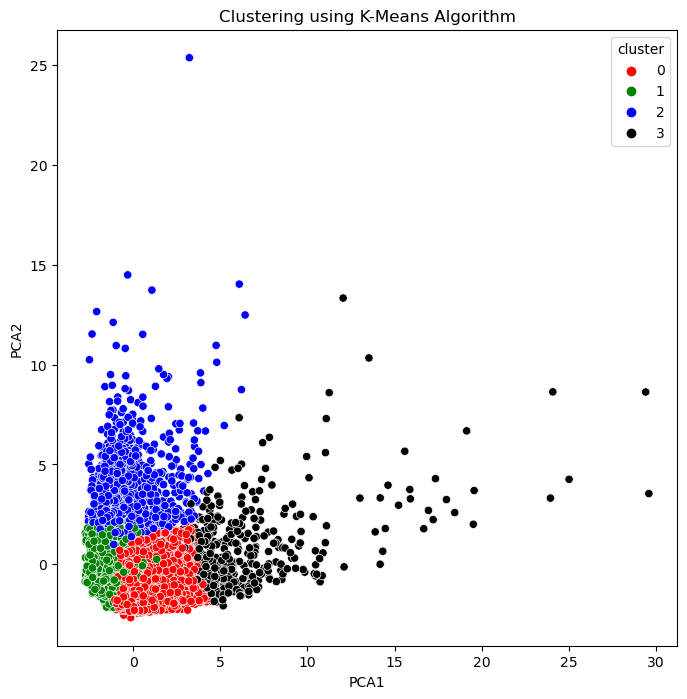

In [47]:
#Visualizing the clustered dataframe
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [48]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [49]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [50]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,3
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,3
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,3
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,3
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,3
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,3
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,3


<Axes: xlabel='Cluster', ylabel='count'>

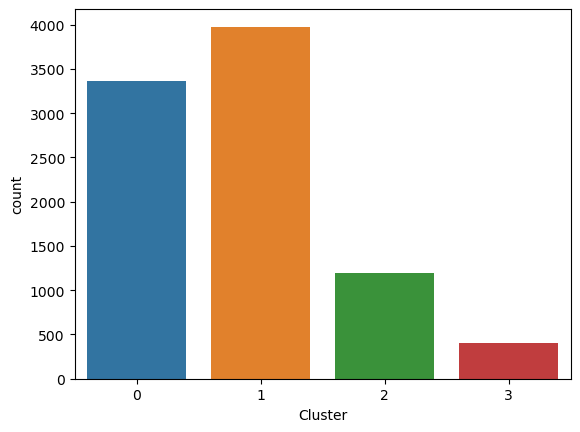

In [51]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

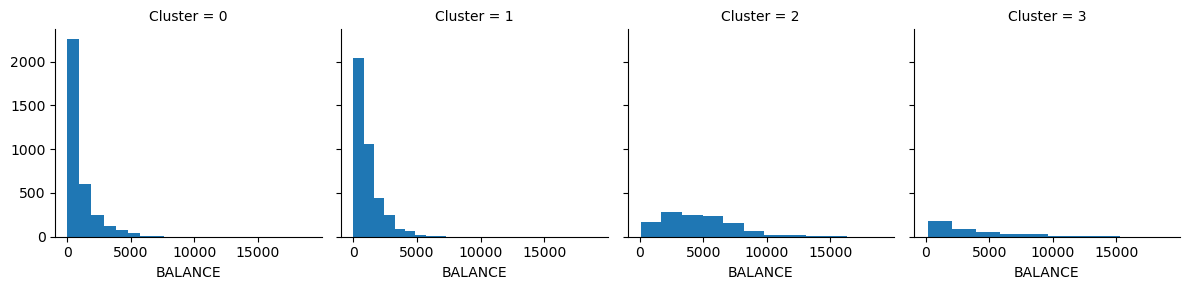

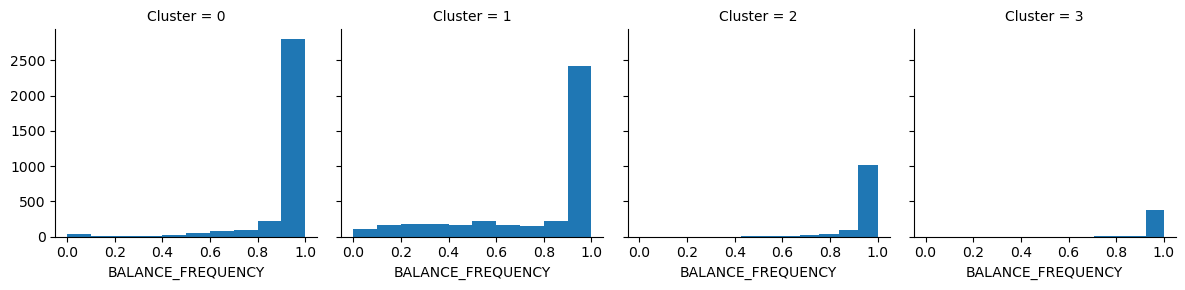

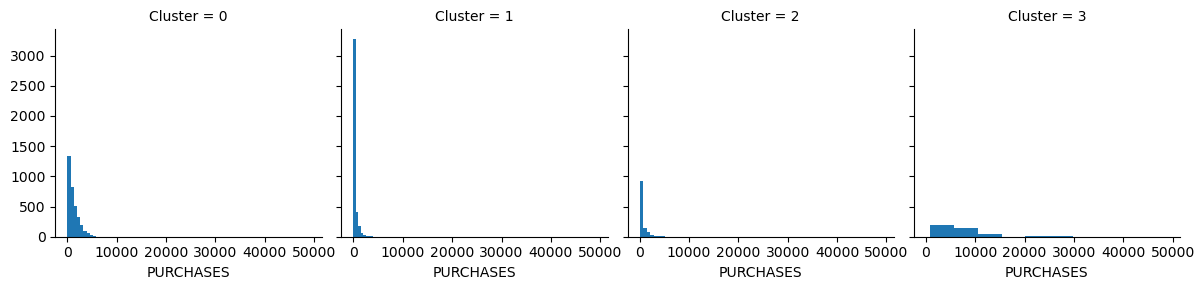

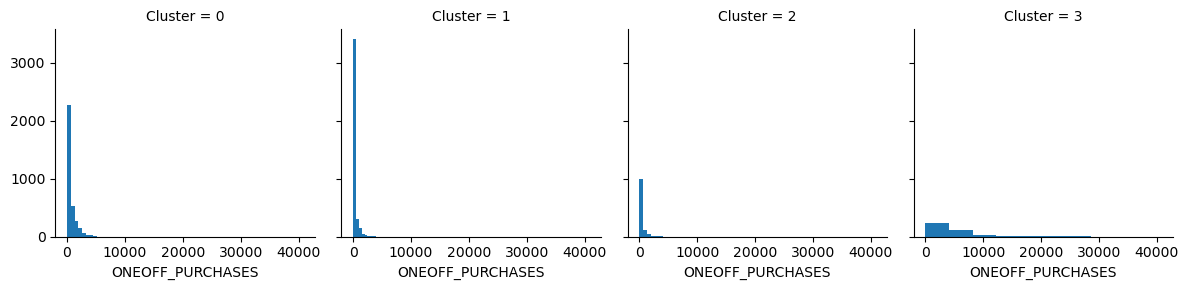

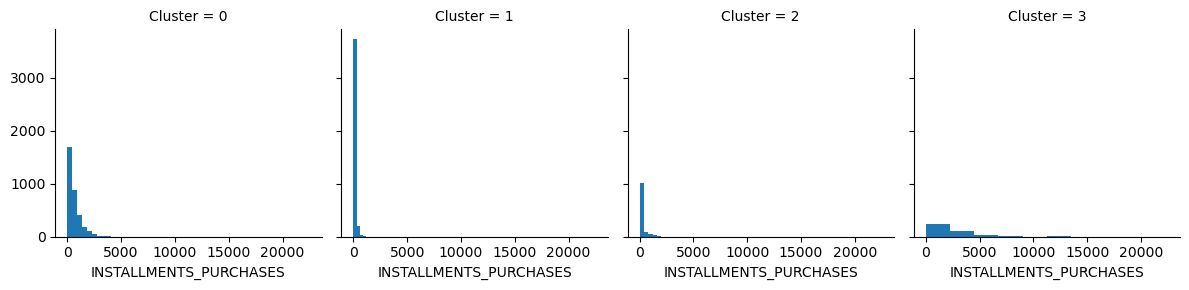

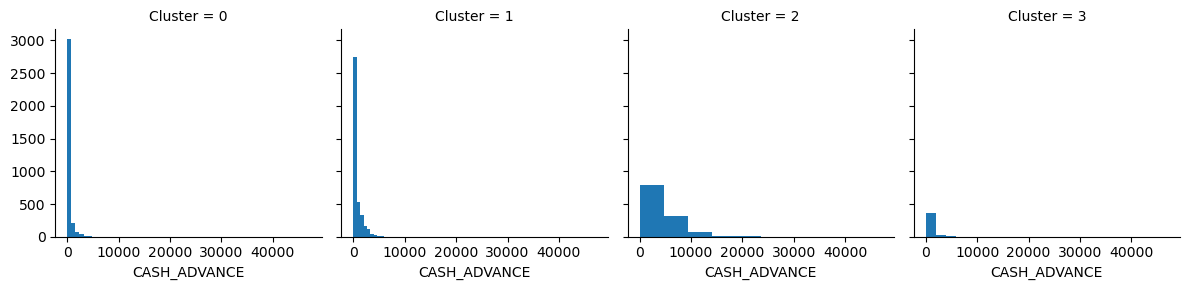

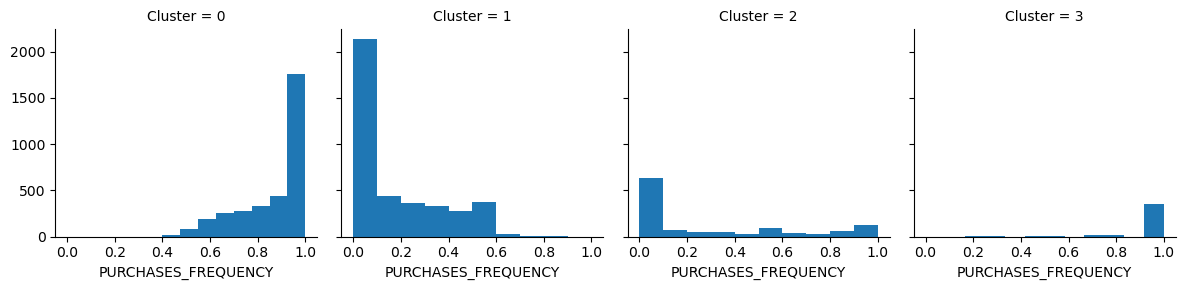

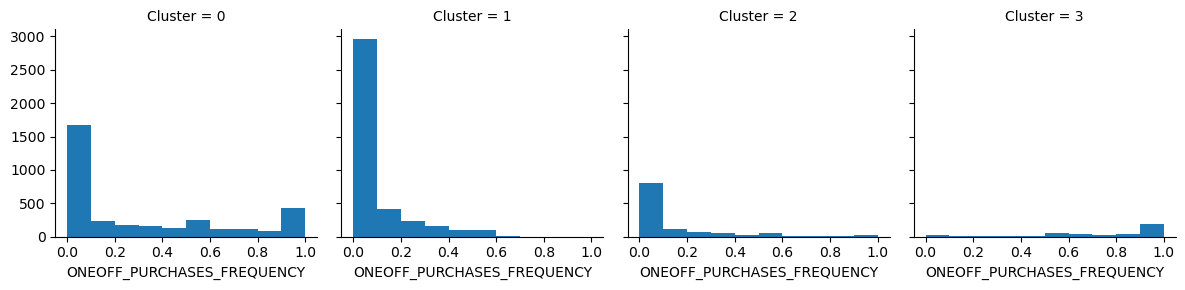

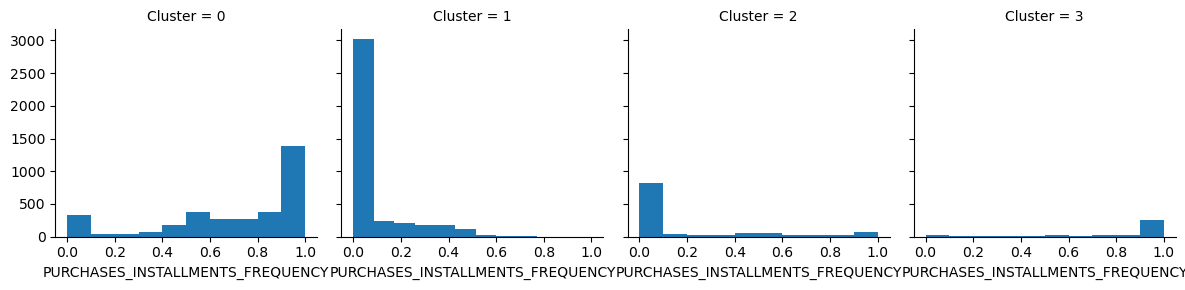

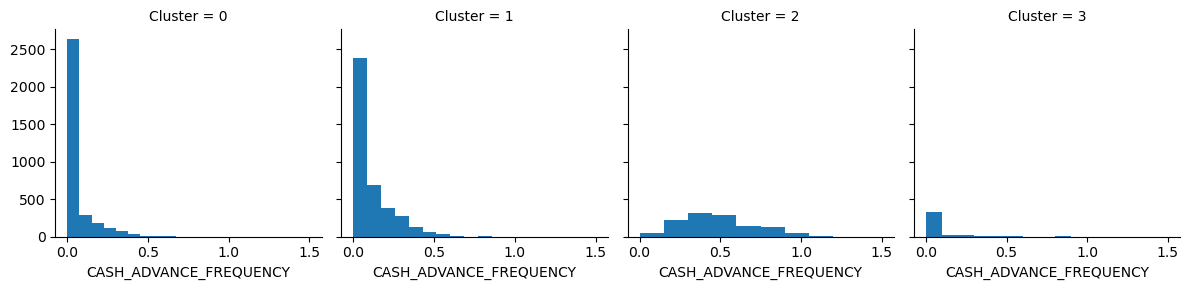

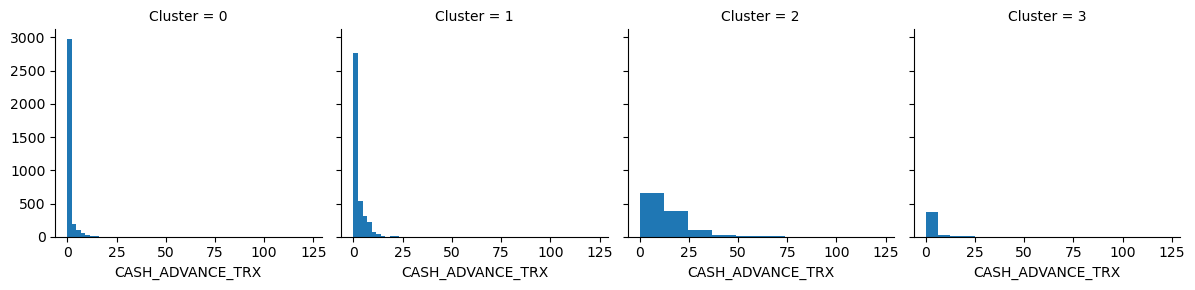

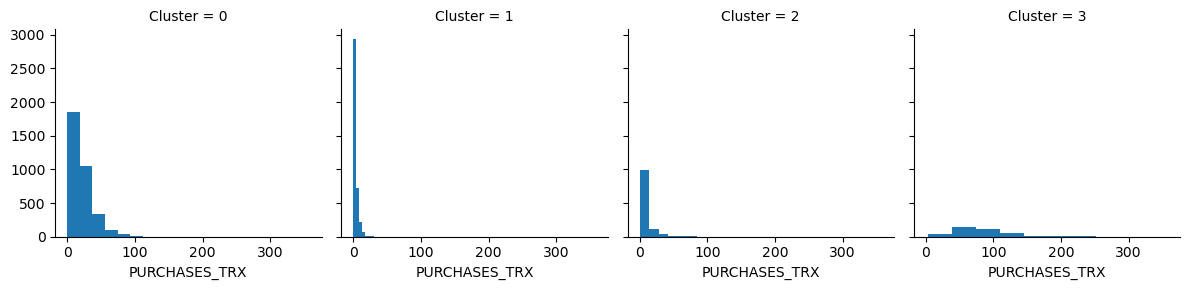

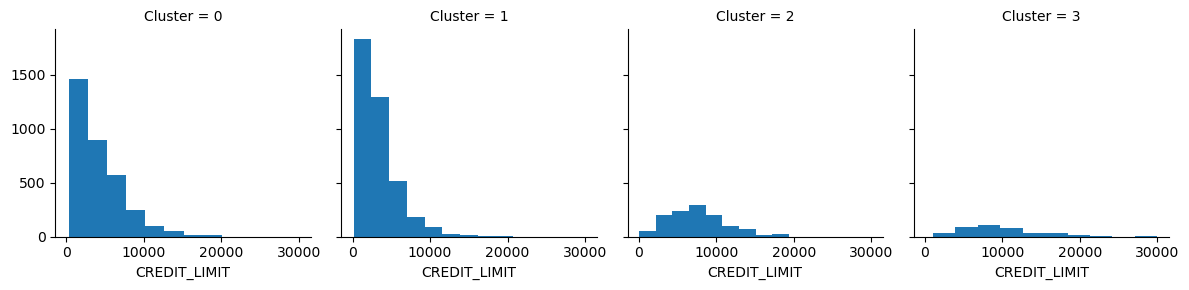

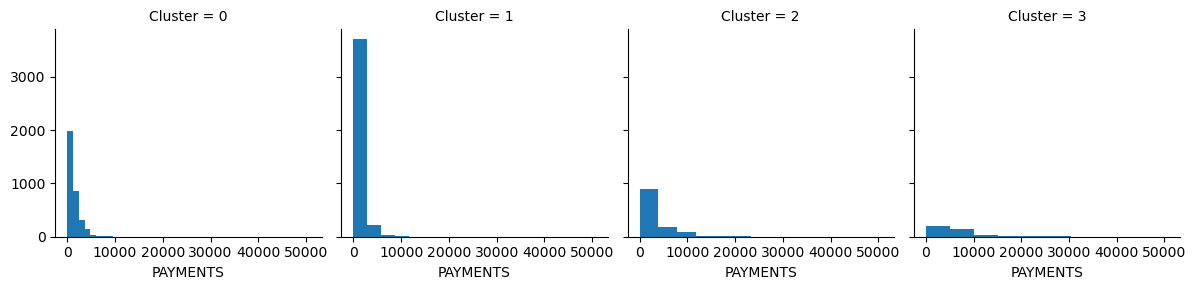

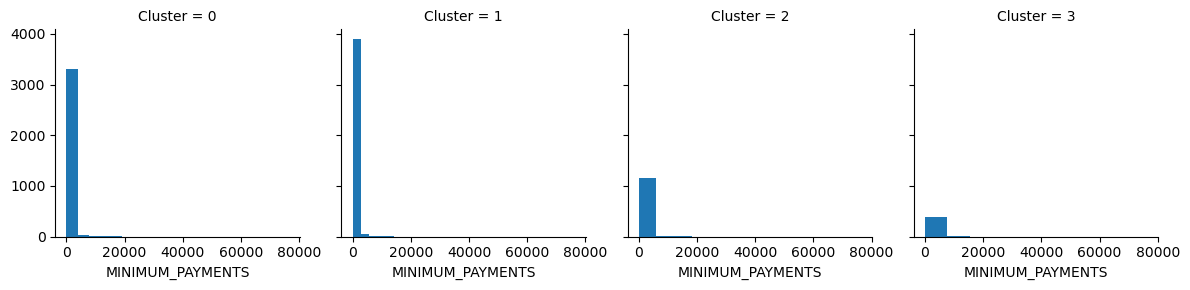

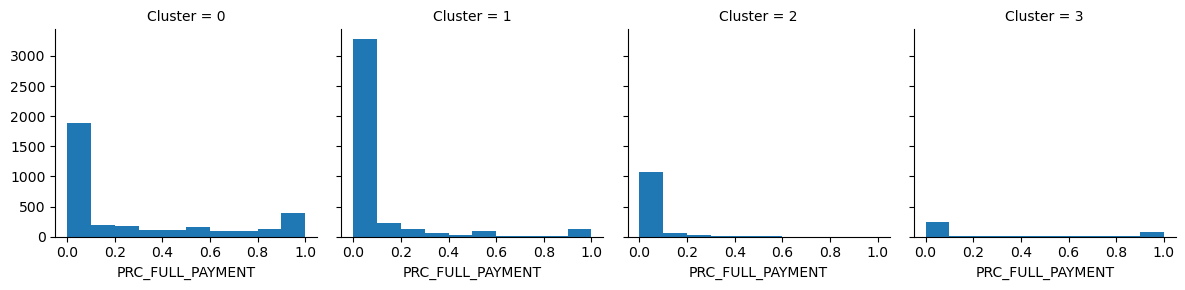

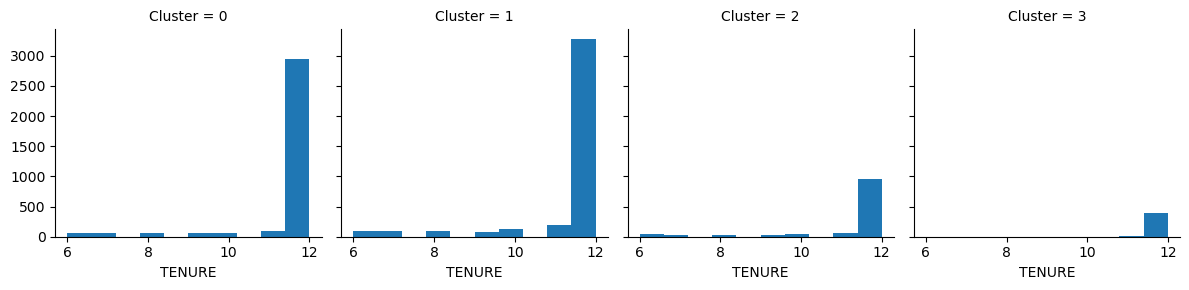

In [52]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [53]:
#Saving the kmeans clustering model and the data with cluster label
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [54]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [55]:
#Training and Testing the model accuracy using decision tree
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [56]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4347,229.667169,1.000000,0.00,0.00,0.00,985.337823,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,1120.658390,131.179377,0.1,12
3876,3723.723928,1.000000,0.00,0.00,0.00,1138.457723,0.000000,0.000000,0.000000,0.333333,6,0,4500.0,930.285952,978.023398,0.0,12
8364,10.400883,0.454545,533.98,293.98,240.00,0.000000,0.500000,0.250000,0.416667,0.000000,0,14,1000.0,1251.380404,33.246072,0.0,12
2821,7.817753,0.272727,170.02,0.00,170.02,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,2000.0,373.028410,73.301702,0.5,12
2705,1258.769693,1.000000,142.00,42.00,100.00,0.000000,0.166667,0.083333,0.083333,0.000000,0,2,1200.0,300.672826,6720.689968,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,776.585568,1.000000,773.36,119.80,653.56,0.000000,0.333333,0.083333,0.250000,0.000000,0,7,3000.0,1169.758034,233.843501,0.0,12
5958,468.851415,1.000000,0.00,0.00,0.00,147.205289,0.000000,0.000000,0.000000,0.083333,1,0,600.0,164.403739,276.486072,0.0,12
916,6725.109914,1.000000,6335.65,912.12,5423.53,0.000000,1.000000,0.583333,1.000000,0.000000,0,108,11000.0,3203.884297,2658.776690,0.0,12
4669,289.353197,1.000000,461.68,201.00,260.68,0.000000,0.333333,0.083333,0.166667,0.000000,0,7,4500.0,282.328051,183.507390,0.0,12


In [57]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
211,3670.505960,1.000000,965.50,876.13,89.37,0.000000,0.500000,0.500000,0.083333,0.000000,0,9,7500.0,1034.932404,941.496383,0.000000,12
7916,29.129725,0.909091,248.76,0.00,248.76,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,3200.0,283.254742,146.346103,0.909091,12
7269,133.797452,0.636364,2460.00,0.00,2460.00,0.000000,0.583333,0.000000,0.500000,0.000000,0,24,2500.0,3601.545344,131.732911,1.000000,12
6776,7.315575,0.181818,107.00,107.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,588.015945,87.805376,0.000000,12
5365,22.689289,0.818182,360.60,160.60,200.00,0.000000,0.666667,0.166667,0.416667,0.000000,0,9,4500.0,415.618854,144.896661,0.857143,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,3490.855736,1.000000,1039.48,1039.48,0.00,4200.991254,0.083333,0.083333,0.000000,0.250000,10,3,9000.0,1091.424125,1048.661408,0.000000,12
2328,234.700486,1.000000,82.00,82.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,4200.0,350.773984,215.834479,0.000000,12
6557,2378.150526,0.833333,0.00,0.00,0.00,4059.469587,0.000000,0.000000,0.000000,0.333333,6,0,5000.0,349.448115,441.102707,0.000000,6
1443,2337.713483,1.000000,773.70,773.70,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,20,9500.0,1004.760912,578.179464,0.000000,12


In [58]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 941   28   18   11]
 [  18 1164   20    0]
 [  17   33  310    6]
 [  13    3    4   99]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       998
           1       0.95      0.97      0.96      1202
           2       0.88      0.85      0.86       366
           3       0.85      0.83      0.84       119

    accuracy                           0.94      2685
   macro avg       0.91      0.90      0.90      2685
weighted avg       0.94      0.94      0.94      2685



In [60]:
#Saving the Decision tree model for future prediction
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9363128491620112 % Acuuracy
